# Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob
import calendar

## Import and merege all data

In [2]:
folder_path = r"C:\Users\criss\Documents\Data Analysis\Python\sales data exercise\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data"

In [3]:
#get all sales data files from folder and concat all into one dataframe
all_csv_files = glob.glob(folder_path + "\*.csv")
df_list = (pd.read_csv(file) for file in all_csv_files)
all_sales_df = pd.concat(df_list, ignore_index = True)

In [4]:
#save to csv
all_sales_df.to_csv("2019 sales data.csv")

In [5]:
all_sales_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


## Cleaning

In [6]:
all_sales_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
all_sales_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
nan_df = all_sales_df[all_sales_df.isna().any(axis =1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#get rid all na values
all_sales_df = all_sales_df.dropna(how = 'all')

In [10]:
#non number types in Order ID column
all_sales_df[all_sales_df["Order ID"] == "Order ID"].head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
#remove empty data labelled the same as column name
all_sales_df = all_sales_df[all_sales_df["Order ID"] != "Order ID"]

In [12]:
#check data types
all_sales_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [13]:
# change data types
all_sales_df["Order ID"] = all_sales_df["Order ID"].astype("int32")
all_sales_df["Product"] = all_sales_df["Product"].astype("string")
all_sales_df["Quantity Ordered"] = all_sales_df["Quantity Ordered"].astype("int32")

In [14]:
all_sales_df["Price Each"] = all_sales_df["Price Each"].astype("float")
all_sales_df["Purchase Address"] = all_sales_df["Purchase Address"].astype("string")

In [15]:
# as date format
all_sales_df["Order Date"] = pd.to_datetime(all_sales_df["Order Date"])

In [16]:
#seperate column for month
all_sales_df['Month'] = all_sales_df["Order Date"].dt.month

In [17]:
#get month name
all_sales_df["Month_name"] = pd.to_datetime(all_sales_df["Month"], format = "%m").dt.month_name().str.slice(stop=3)

In [18]:
all_sales_df.dtypes

Order ID                     int32
Product                     string
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            string
Month                        int64
Month_name                  object
dtype: object

In [19]:
all_sales_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr


In [20]:
# calculate total pirce, quantity x unit price
all_sales_df["Total price"] = all_sales_df["Quantity Ordered"]*all_sales_df["Price Each"]

## Get Cities

In [21]:
#function to split city 
def get_city(address):
    return address.split(",")[1]
#function to split state
def get_state(address):
    return address.split(",")[2][:3]

In [22]:
all_sales_df['City'] = all_sales_df['Purchase Address'].apply(lambda x: get_city(x) + " " + get_state(x) )

## Best month for sales

In [23]:
all_sales_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_name,Total price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,Los Angeles CA


In [24]:
sales_by_month = pd.DataFrame(all_sales_df.groupby(["Month", "Month_name"])["Total price"].sum())

In [25]:
sales_by_month = sales_by_month.reset_index()

In [26]:
sales_by_month

,Month,Month_name,Total price
0,1,Jan,1.822257e+06
1,2,Feb,2.202022e+06
2,3,Mar,2.807100e+06
3,4,Apr,3.390670e+06
4,5,May,3.152607e+06
5,6,Jun,2.577802e+06
6,7,Jul,2.647776e+06
7,8,Aug,2.244468e+06
8,9,Sep,2.097560e+06
9,10,Oct,3.736727e+06


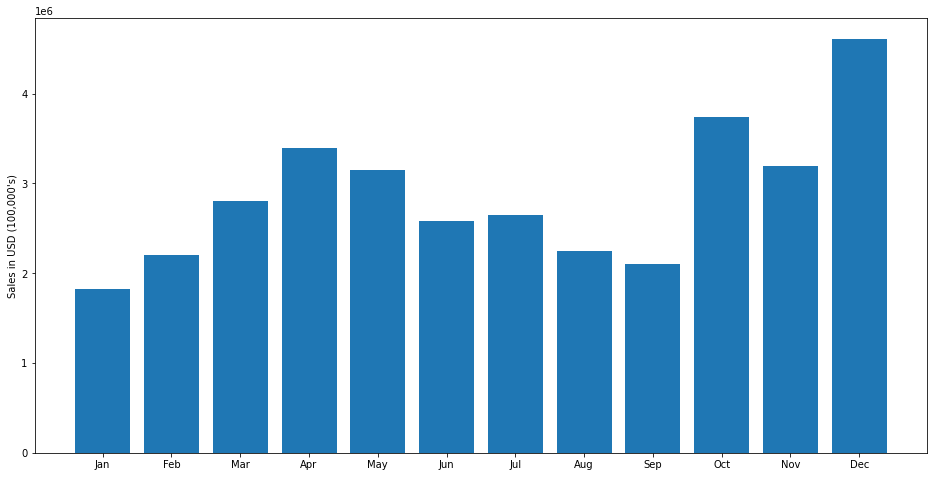

In [27]:
f, ax = plt.subplots(figsize = (16, 8))
plt.bar(sales_by_month["Month_name"], sales_by_month["Total price"])
ax.set_xticks(sales_by_month.index)
ax.set_ylabel("Sales in USD (100,000's)")
plt.show()


In [28]:
sales_by_month.sort_values(by ="Total price", ascending = False)[:3]

,Month,Month_name,Total price
11,12,Dec,4.613443e+06
9,10,Oct,3.736727e+06
3,4,Apr,3.390670e+06


## What city had the best sales

In [29]:
all_sales_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_name,Total price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,Los Angeles CA


In [30]:
sales_by_city = pd.DataFrame(all_sales_df.groupby(["City"])[["Quantity Ordered", "Total price"]].sum())

In [31]:
sales_by_city["Total price (Millions)"] = sales_by_city["Total price"]/1000000

In [32]:
sales_by_city

,Quantity Ordered,Total price,Total price (Millions)
City,,,
Atlanta GA,16602,2.795499e+06,2.795499
Austin TX,11153,1.819582e+06,1.819582
Boston MA,22528,3.661642e+06,3.661642
Dallas TX,16730,2.767975e+06,2.767975
Los Angeles CA,33289,5.452571e+06,5.452571
New York City NY,27932,4.664317e+06,4.664317
Portland ME,2750,4.497583e+05,0.449758
Portland OR,11303,1.870732e+06,1.870732
San Francisco CA,50239,8.262204e+06,8.262204


<ipython-input-33-803193aeed8f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sales_by_city.index, size = 12, rotation=45, ha='right')


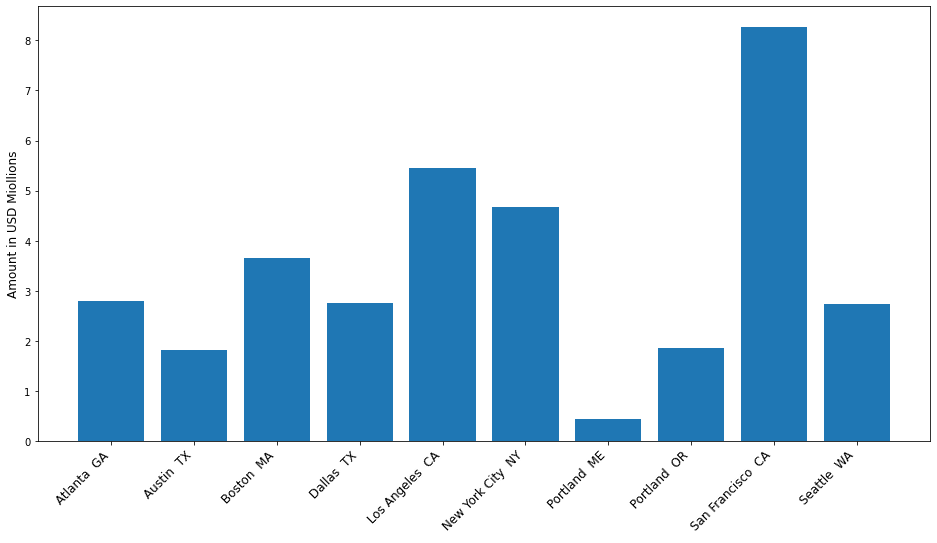

In [33]:
f1, ax = plt.subplots(figsize = (16, 8))
plt.bar(sales_by_city.index, sales_by_city["Total price (Millions)"])

ax.set_xticklabels(sales_by_city.index, size = 12, rotation=45, ha='right')
ax.set_ylabel("Amount in USD Miollions", size = 12)
plt.show()

## Best time for advertising

In [34]:
all_sales_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_name,Total price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,Los Angeles CA


In [35]:
all_sales_df['Hour'] = all_sales_df['Order Date'].dt.hour
all_sales_df['Minute'] = all_sales_df['Order Date'].dt.minute

In [36]:
from matplotlib.pyplot import figure

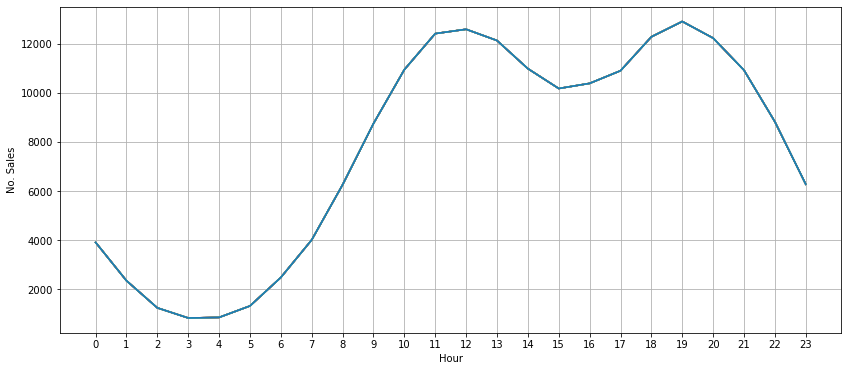

In [37]:
figure(figsize = (14, 6))
hours = [hour for hour, df in all_sales_df.groupby('Hour')]
plt.plot(hours, all_sales_df.groupby('Hour').count())
plt.ylabel("No. Sales")
plt.xlabel("Hour")
plt.xticks(hours)
plt.grid()
plt.show()

## What products are most often sold together
this is based on order ID

In [51]:
same_id = all_sales_df[all_sales_df["Order ID"].duplicated(keep=False)]

In [52]:
same_id["Grouped"] = same_id.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))

<ipython-input-52-75608ccf906a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_id["Grouped"] = same_id.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


In [53]:
same_id = same_id[["Order ID", "Grouped"]].drop_duplicates()

In [54]:
same_id.head(10)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [56]:
same_id.Grouped.value_counts()

iPhone,Lightning Charging Cable                                     882
Google Phone,USB-C Charging Cable                                   856
iPhone,Wired Headphones                                             361
Vareebadd Phone,USB-C Charging Cable                                312
Google Phone,Wired Headphones                                       303
                                                                   ... 
iPhone,iPhone                                                         1
LG Dryer,AAA Batteries (4-pack)                                       1
Google Phone,Bose SoundSport Headphones,Lightning Charging Cable      1
Vareebadd Phone,USB-C Charging Cable,Apple Airpods Headphones         1
Google Phone,USB-C Charging Cable,Wired Headphones,iPhone             1
Name: Grouped, Length: 366, dtype: int64

In [57]:
from itertools import combinations
from collections import Counter

In [61]:
count = Counter()

for row in same_id["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [62]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [63]:
count = Counter()

for row in same_id["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 3)))

    
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

## What products sold the most

In [68]:
most_sold = pd.DataFrame(all_sales_df.groupby("Product")["Quantity Ordered"].sum())

In [69]:
most_sold

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


In [77]:
prices = pd.DataFrame(all_sales_df.groupby("Product")["Price Each"].mean())

In [78]:
prices

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


<ipython-input-83-37df5a1e248d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(most_sold.index, size = 12, rotation=45, ha='right')


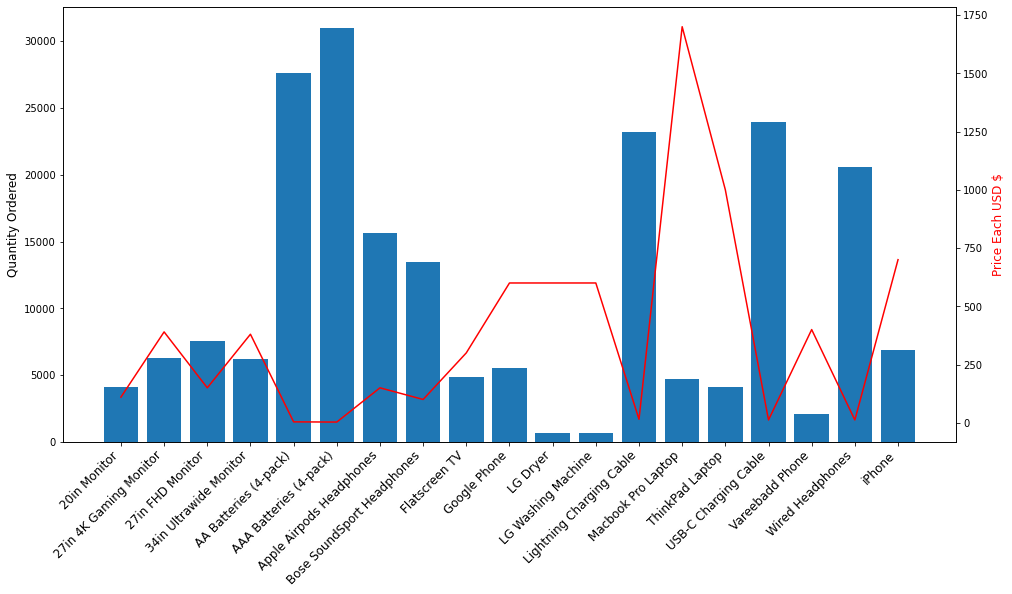

In [83]:
fig, ax1 = plt.subplots(figsize = (16, 8))

ax2 = ax1.twinx()

ax1.bar(most_sold.index, most_sold["Quantity Ordered"])
ax2.plot(prices.index, prices["Price Each"], color = 'r')

ax1.set_xticklabels(most_sold.index, size = 12, rotation=45, ha='right')
ax1.set_ylabel("Quantity Ordered", size = 12)
ax2.set_ylabel("Price Each USD $", size = 12, color = 'r')

plt.show()